In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
!pip install plotly
import plotly.express as px
warnings.filterwarnings('ignore')
!pip install sidetable
import sidetable as stb

## Exploratory Data Analysis

In [ ]:
pd.set_option('display.max_columns', None) #untuk menampilkan semua kolom
pd.set_option('display.max_rows', 100)# untuk menampilkan maksimal 100 kolom

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/folder final project/data_for_eda.csv')
# jika tidak ditaruh folder manapun, cukup dengan df = pd.read_csv('gdrive/My Drive/data_for_eda.csv')

In [ ]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,1,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn
1,2,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct
2,6,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn
3,17,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn
4,18,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm


In [ ]:
df = df.drop(['Unnamed: 0'],axis=1) # melakukan drop pada kolomn yang tidak terpakai

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,MN,basic car
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,CT,basic car
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,MN,basic car
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,MN,basic car
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,NM,luxury car


In [ ]:
print('Total rows:',df.shape[0] )
print('Total kolom: ',df.shape[1])
print('Daftar kolom: ',df.columns)

Total rows: 147129
Total kolom:  15
Daftar kolom:  Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147129 entries, 0 to 147128
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         147129 non-null  int64 
 1   year          147129 non-null  int64 
 2   manufacturer  147129 non-null  object
 3   model         147129 non-null  object
 4   condition     147129 non-null  object
 5   cylinders     147129 non-null  object
 6   fuel          147129 non-null  object
 7   odometer      147129 non-null  int64 
 8   title_status  147129 non-null  object
 9   transmission  147129 non-null  object
 10  drive         147129 non-null  object
 11  size          147129 non-null  object
 12  type          147129 non-null  object
 13  paint_color   147129 non-null  object
 14  state         147129 non-null  object
dtypes: int64(3), object(12)
memory usage: 16.8+ MB


In [ ]:
df.describe()

,price,year,odometer
count,147129.000000,147129.000000,147129.000000
mean,19650.135194,2014.991626,61359.974866
std,10635.140046,2.862059,32203.592958
min,2000.000000,2009.000000,0.000000
25%,11590.000000,2013.000000,34047.000000
50%,16995.000000,2015.000000,63172.000000
75%,25988.000000,2017.000000,87371.000000
max,50835.000000,2020.000000,120000.000000


### Feature Engineering

Pada kolom price dan kolom odo akan dilakukan feature engineering untuk membantu proses analisis 

In [ ]:
# Binning the price column

bin_car = [1999, df['price'].mean(),df['price'].max()]
label_car = ['basic car','luxury car']
df['class_car'] = pd.cut(df['price'], bins = bin_car, labels = label_car)

In [ ]:
# Binning the odometer column

bin_odo = [-1, 30000,60000,90000,df['odometer'].max()]
label_odo = ['<30K','30-60K','60K-90K','90K<']
df['range_odo'] = pd.cut(df['odometer'], bins = bin_odo, labels = label_odo)

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car,range_odo
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,MN,basic car,90K<
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,CT,basic car,90K<
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,MN,basic car,90K<
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,MN,basic car,90K<
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,NM,luxury car,60K-90K


In [ ]:
df.describe(include='category')

,class_car
count,147129
unique,2
top,basic car
freq,87261


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147129 entries, 0 to 147128
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         147129 non-null  int64   
 1   year          147129 non-null  int64   
 2   manufacturer  147129 non-null  object  
 3   model         147129 non-null  object  
 4   condition     147129 non-null  object  
 5   cylinders     147129 non-null  object  
 6   fuel          147129 non-null  object  
 7   odometer      147129 non-null  int64   
 8   title_status  147129 non-null  object  
 9   transmission  147129 non-null  object  
 10  drive         147129 non-null  object  
 11  size          147129 non-null  object  
 12  type          147129 non-null  object  
 13  paint_color   147129 non-null  object  
 14  state         147129 non-null  object  
 15  class_car     147129 non-null  category
dtypes: category(1), int64(3), object(12)
memory usage: 17.0+ MB


### 3.1 Univariate

#### 3.1.1 Class Car

In [ ]:
cc = df.stb.freq(['class_car'], cum_cols =False)
cc

,class_car,count,percent
0,basic car,87261,59.309178
1,luxury car,59868,40.690822


In [ ]:
fig = px.pie(data_frame=cc, names='class_car', values='count', title='Class Car')
fig.show()
plt.savefig('class car.png')

<Figure size 432x288 with 0 Axes>

Class mobil bekas yang paling banyak dijual adalah basic car sebanyak 87.261 /59.3% sedangkan luxury car sebanyak 59.868 / 40,7% 

#### 3.1.2 Price

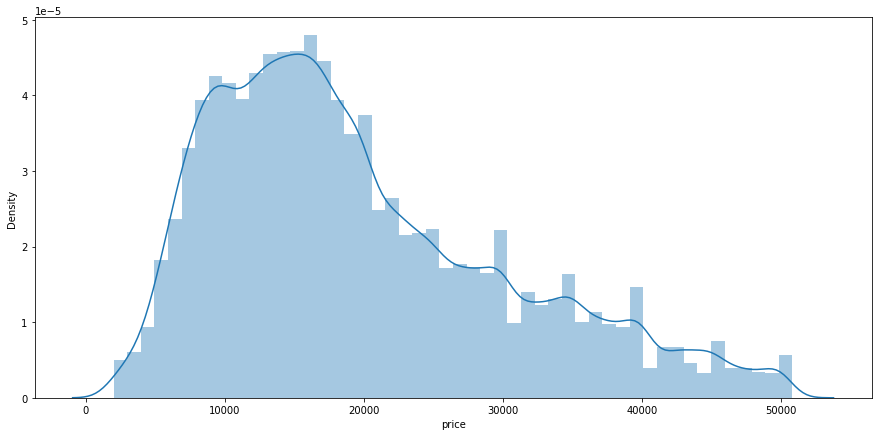

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df['price'], label='Price');
plt.savefig('persebaran_harga.png')

Berdasarkan plot diatas, distribusi kolom price terlihat menunjukkan Skewness yang bernilai positif dimana ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah dan nilai rata-rata nya diatas nilai median. Hal ini juga menunjukkan bahwa kebanyakan dari mobil yang dijual harganya dibawah rata-rata/median dan ada beberapa mobil yang terjual dengan harga yang sangat tinggi jauh melebihi harga pasaran.

In [ ]:
df['price'].describe()

count    147129.000000
mean      19650.135194
std       10635.140046
min        2000.000000
25%       11590.000000
50%       16995.000000
75%       25988.000000
max       50835.000000
Name: price, dtype: float64

#### 3.1.3 Manufacturer

In [ ]:
mn = df.stb.freq(['manufacturer'], cum_cols =False)
mn

,manufacturer,count,percent
0,ford,25653,17.435720
1,chevrolet,19682,13.377376
2,toyota,11061,7.517892
3,nissan,9985,6.786561
4,honda,7795,5.298072
5,jeep,7137,4.850845
6,dodge,6101,4.146701
7,hyundai,5285,3.592086
8,ram,5028,3.417409
9,gmc,4983,3.386824


In [ ]:
fig = px.bar(mn, x='manufacturer', y='percent', title='Manufacturer of Used Car')
fig.show()
plt.savefig('manufacturer_of_Used_Car.png')

<Figure size 432x288 with 0 Axes>

5 Merk mobil bekas yang paling banyak dijual di USA adalah Ford, Chevrolet, Toyota, Nissan, Honda. Dari kelima tersebut, merk mobil yang paling banyak dijual di USA adalah Ford sebanyak 25.653 atau persentasenya adalah  17,43%  

#### 3.1.4 Type

In [ ]:
df_type = df[df['type']!='other']
ty =df_type.stb.freq(['type'], cum_cols =False)
ty


,type,count,percent
0,sedan,33687,31.881548
1,SUV,30524,28.888069
2,pickup,10267,9.716741
3,truck,8901,8.423952
4,hatchback,5560,5.262012
5,coupe,5434,5.142765
6,wagon,4242,4.014650
7,van,3666,3.469521
8,mini-van,1944,1.839811
9,convertible,1328,1.256826


In [ ]:
fig = px.bar(ty, x='type', y='percent', title='Type of Used Cars')
fig.show()
plt.savefig('type_of_used_car.png')

<Figure size 432x288 with 0 Axes>

5 Type mobil yang paling banyak dijual adalah Sedan, Suv, pickup, truck, dan hatchback. dari kelima type tersebut, jenis sedan paling banyak dijual dengan total sebanyak 33.687 dengan percentase sebanyak 22,89%

#### 3.1.5 Model

In [ ]:
model =df.stb.freq(['model'], cum_cols =False).head(10)
model

,model,count,percent
0,f-150,2683,1.823570
1,escape,1896,1.288665
2,silverado 1500,1764,1.198948
3,1500,1393,0.946788
4,altima,1376,0.935234
5,equinox,1359,0.923679
6,fusion,1220,0.829204
7,explorer,1208,0.821048
8,cruze,1126,0.765315
9,grand caravan,1122,0.762596


In [ ]:
fig = px.bar(model, x='model', y='percent', title='Model of Used Cars')
fig.show()
plt.savefig('model_of_used.png')

<Figure size 432x288 with 0 Axes>

Model Mobil yang paling banyak dijual adalah f-150 sebanyak 2683 atau persentasenya adalah 1,82%

#### 3.1.6 Year

In [ ]:
year = df.stb.freq(['year'], cum_cols =False)
year

,year,count,percent
0,2017,24250,16.482135
1,2016,16178,10.995793
2,2015,15862,10.781015
3,2014,14839,10.085707
4,2018,13675,9.294565
5,2013,13555,9.213004
6,2019,12751,8.666544
7,2012,11069,7.523330
8,2011,9330,6.341374
9,2010,6710,4.560624


In [ ]:
fig = px.bar(year, x='year', y='percent', title='Year of Used Car Release')
fig.show()
plt.savefig('Year_of_Used_car_release.png')

<Figure size 432x288 with 0 Axes>

Tahun pembuatan mobil paling banyak dijual adalah tahun 2017 sebanyak 24.250 atau 16.48 %

#### 3.1.7 State

In [ ]:
df['state']= df['state'].str.upper()
state =df.stb.freq(['state'], cum_cols =False)
state

,state,count,percent
0,CA,15332,10.420787
1,FL,10342,7.029206
2,TX,8419,5.722189
3,NY,6491,4.411775
4,OH,5777,3.926486
5,MI,5730,3.894542
6,WA,5720,3.887745
7,WI,4807,3.267201
8,NC,4771,3.242733
9,TN,4396,2.987854


In [ ]:
fig = px.choropleth(locations=state['state'], locationmode="USA-states",
                    color=state["count"], scope="usa", hover_name=state['state'], title="Map Sell Of Used Car")
fig.show()
plt.savefig('map_sell_of_used.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = px.bar(state, x='state', y='percent', title='State of Used Car')
fig.show()
plt.savefig('state_of_used_Car.png')

<Figure size 432x288 with 0 Axes>

State/Negara bagian yang paling banyak menjual mobil bekas adalah CA (california) sebanyak 15.332 atau persentasenya sebanyak 10.41%. untuk informasi mengenai code dari setiap state ada di https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971

#### 3.1.8 Transmission

In [ ]:
df_trans = df[df['transmission']!='other']
trans =df_trans.stb.freq(['transmission'], cum_cols =False)
trans

,transmission,count,percent
0,automatic,131888,95.571014
1,manual,6112,4.428986


In [ ]:
fig = px.pie(data_frame=trans, names='transmission', values='count', title='Transmission of Used Cars')
fig.show()
plt.savefig('Transmission_of_used_cars.png')

<Figure size 432x288 with 0 Axes>

Mobil bekas yang paling banyak dijual adalah mobil dengan transmission matic sebanyak 131.888/95.6%

### 3.2 Multivariate

In [ ]:
lux_car = df[df['class_car']=='luxury car']
bas_car = df[df['class_car']=='basic car']


#### 3.2.1 Basic Car

##### 3.2.1.1 Type Used Basic car by Median Price

In [ ]:
bc = bas_car[bas_car['type']!='other']
type_price_bs = pd.crosstab(columns='median price', index=bc['type'],values=bc['price'], aggfunc='median')
type_price_bs = type_price_bs.sort_values(by=['median price'],ascending=False)
type_price_bs.reset_index(inplace=True)
type_price_bs

col_0,type,median price
0,pickup,15999.0
1,offroad,15750.0
2,truck,15500.0
3,van,14990.0
4,SUV,13997.0
5,coupe,13544.5
6,convertible,13499.0
7,wagon,12995.0
8,mini-van,12422.0
9,sedan,11980.0


In [ ]:
fig = px.bar(type_price_bs, x='type', y='median price', title='Type Used Basic car by Median Price')
fig.show()
plt.savefig('Type_used_basic_car_by_median_price.png')

<Figure size 432x288 with 0 Axes>

Jenis tipe Used basic car yang memiliki median paling mahal adalah offroad sedangkan jenis mobil yang memiliki median paling murah adalah hatch back

##### 3.2.1.2 Manufacturer Used Basic Car By Median Price

In [ ]:
merk_price_bc = pd.crosstab(columns='median price', index=bas_car['manufacturer'],values=bas_car['price'], aggfunc='median')
merk_price_bc = merk_price_bc.sort_values(by=['median price'],ascending=False)
merk_price_bc = merk_price_bc.reset_index()
merk_price_bc

col_0,manufacturer,median price
0,land rover,15995
1,ram,15495
2,lexus,14998
3,infiniti,14500
4,acura,14500
5,cadillac,14275
6,gmc,14150
7,mercedes-benz,13998
8,audi,13998
9,bmw,13995


In [ ]:
fig = px.bar(merk_price_bc, x='manufacturer', y='median price', title='Manufacture Used Basic Cars by Median Price')
fig.show()
plt.savefig('Manufacture_used_base_cars.png')

<Figure size 432x288 with 0 Axes>

Manufacturer Used basic car yang memiliki median paling mahal adalah land-rover sedangkan manufacturer used basic car yang memiliki median paling murah adalah Saturn

##### 3.2.1.3 State of Sell Used Basic Car By Median Price

In [ ]:
state_price_bs = pd.crosstab(columns='median price', index=bas_car['state'],values=bas_car['price'], aggfunc='median')
state_price_bs = state_price_bs.sort_values(by=['median price'],ascending=False)
state_price_bs = state_price_bs.reset_index()
state_price_bs

col_0,state,median price
0,WA,14500.0
1,MT,13998.0
2,AK,13995.0
3,IN,13995.0
4,AR,13995.0
5,SD,13995.0
6,HI,13995.0
7,ND,13990.0
8,NE,13800.0
9,NC,13600.0


In [ ]:
# state_price_bs =  df.stb.freq(['state'], cum_cols = False)
fig = px.choropleth(locations=state_price_bs['state'], locationmode="USA-states",
                    color=state_price_bs["median price"], scope="usa", hover_name=state_price_bs['state'], title="Map Sell Of Used Basic Car ")
                    
fig.show()
plt.savefig('map_sell_of_used_basic car.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = px.bar(state_price_bs, x='state', y='median price', title='State of Sell Used Basic Car By Median Price')
fig.show()
plt.savefig('state_of_used_basic_car.png')

<Figure size 432x288 with 0 Axes>


Penjualan mobil bekas basic yang memiliki median paling mahal adalah Washington sedangkan penjualan mobil bekas basic yang memiliki median paling murah adalah West Virginia

##### 3.2.1.4 Median Price of Used Basic Car by Year

In [ ]:
year_price_bs = pd.crosstab(columns='median price', index=bas_car['year'],values=bas_car['price'], aggfunc='median')
year_price_bs = year_price_bs.sort_values(by=['median price'],ascending=False)
year_price_bs = year_price_bs.reset_index()
year_price_bs

col_0,year,median price
0,2020,16995
1,2019,16947
2,2018,15999
3,2017,15988
4,2016,13995
5,2015,12995
6,2014,12795
7,2013,11495
8,2011,9995
9,2012,9995


In [ ]:
fig = px.bar(year_price_bs, x='year', y='median price', title='Median Price of Used Basic Car by Year')
fig.show()
plt.savefig('median_price_year_basic.png')

<Figure size 432x288 with 0 Axes>

Terlihat jelas bahwa untuk tahun rilis Used basic car, semakin tua usia mobil maka akan semakin murah.

##### 3.2.1.5 Title Status by Median Price

In [ ]:
ts_bs = bas_car[bas_car['title_status']!='unknown']
ts_price_bs = pd.crosstab(columns='median price', index=ts_bs['title_status'],values=ts_bs['price'], aggfunc='median')
ts_price_bs = ts_price_bs.sort_values(by=['median price'],ascending=False)
ts_price_bs = ts_price_bs.reset_index()
ts_price_bs 


col_0,title_status,median price
0,lien,13000
1,clean,12950
2,rebuilt,9900
3,salvage,9500


In [ ]:
fig = px.bar(ts_price_bs, x='title_status', y='median price', title='Median Price of Used Basic Car by Title Status')
fig.show()
plt.savefig('median_price_basic_title_status.png')

<Figure size 432x288 with 0 Axes>

Untuk status dari used basic car median tertinggi adalah lien dan termurah adalah salvage,namun terlihat bahwa harga mobil yang statusnya lien tampak lebih mahal dari clean sehingga semakin jelas jika mempunyai uang lebih, lebih baik membeli mobil yang statusnya clean


##### 3.2.1.6 Transmission Used Basic Car by Median Price

In [ ]:
transmission_price_bs = pd.crosstab(columns='median price', index=bas_car['transmission'],values=bas_car['price'], aggfunc='median')
transmission_price_bs = transmission_price_bs.reset_index()
transmission_price_bs=transmission_price_bs[0:2]
transmission_price_bs

col_0,transmission,median price
0,automatic,12750
1,manual,10495


In [ ]:
fig = px.bar(transmission_price_bs, x='transmission', y='median price', title='Median Price of Used Basic Car by Transmission')
fig.show()
plt.savefig('median_price_basic_car_transmisiion.png')

<Figure size 432x288 with 0 Axes>

Untuk Transmission dari used basic car median tertinggi adalah automatic

##### 3.2.1.7 Odometer Used Basic Car by Median Price

In [ ]:
odo_price_bc = pd.crosstab(columns='median price', index=bas_car['range_odo'],values=bas_car['price'], aggfunc='median')
odo_price_bc = odo_price_bc.reset_index()
odo_price_bc

col_0,range_odo,median price
0,<30K,15991
1,30-60K,14995
2,60K-90K,11750
3,90K<,10500


In [ ]:
fig = px.bar(odo_price_bc, x='range_odo', y='median price', title='Median Price of Used Basic Car by Odometer')
fig.show()
plt.savefig('median_price_bsd_odometer.png')

<Figure size 432x288 with 0 Axes>

terlihat sangat jelas jika odometer semakin tinggi maka harga mobil bekas tersebut akan lebih murah

##### 3.2.1.8 Cylinder Used Basic Car by Median Price

In [ ]:
cy_bs = bas_car[bas_car['cylinders']!='other']
cyl_price_bc = pd.crosstab(columns='median price', index=cy_bs['cylinders'],values=cy_bs['price'], aggfunc='median')
cyl_price_bc = cyl_price_bc.reset_index()
cyl_price_bc

col_0,cylinders,median price
0,10 cylinders,16900.0
1,3 cylinders,8900.0
2,4 cylinders,11500.0
3,5 cylinders,7998.5
4,6 cylinders,12999.0
5,8 cylinders,15797.0


In [ ]:
fig = px.bar(cyl_price_bc, x='cylinders', y='median price', title='Median Price of Used Basic Car by Cylinders')
fig.show()
plt.savefig('median_price_bs_cylinders.png')

<Figure size 432x288 with 0 Axes>

Cylinders yang memiliki median price tertinggi adalah mobil yang memiliki 10 cylinders

##### 3.2.1.9 Fuel Used Basic Car by Median Price

In [ ]:
fl_bs = bas_car[bas_car['fuel']!='other']
fl_price_bc = pd.crosstab(columns='median price', index=fl_bs['fuel'],values=fl_bs['price'], aggfunc='median')
fl_price_bc = fl_price_bc.reset_index()
fl_price_bc

col_0,fuel,median price
0,diesel,12500
1,electric,11590
2,gas,12750
3,hybrid,12000


In [ ]:
fig = px.bar(fl_price_bc, x='fuel', y='median price', title='Median Price of Used Basic Car by Fuel')
fig.show()
plt.savefig('median_price_ub_fuel.png')

<Figure size 432x288 with 0 Axes>

jika dilihat berdasarkan bahan bakarnya, bahan bakal gas memiliki median price yang paling tinggi untuk basic car

##### 3.2.1.10 Condition Used Basic Car by Median Price

In [ ]:
co_bs = bas_car[bas_car['condition']!='unknown']
co_price_bc = pd.crosstab(columns='median price', index=fl_bs['condition'],values=co_bs['price'], aggfunc='median')
co_price_bc = co_price_bc.reset_index()
co_price_bc

col_0,condition,median price
0,excellent,11499.0
1,fair,5000.0
2,good,12990.0
3,like new,12900.0
4,new,12200.0
5,salvage,7000.0


In [ ]:
fig = px.bar(co_price_bc, x='condition', y='median price', title='Median Price of Used Basic Car by Condition')
fig.show()
plt.savefig('median_price_used_bc_condition.png')

<Figure size 432x288 with 0 Axes>

jika dilihat berdasarkan Kondisi mobil, kondisi good memiliki median price yang paling tinggi untuk basic car

##### 3.2.1.11 Drive Used Basic Car by Median Price

In [ ]:
dr_bs = bas_car[bas_car['drive']!='Unknown']
dr_price_bc = pd.crosstab(columns='median price', index=dr_bs['drive'],values=dr_bs['price'], aggfunc='median')
dr_price_bc = dr_price_bc.reset_index()
dr_price_bc

col_0,drive,median price
0,4wd,14199
1,fwd,11995
2,rwd,14500


In [ ]:
fig = px.bar(dr_price_bc, x='drive', y='median price', title='Median Price of Used Basic Car by Drive')
fig.show()
plt.savefig('median_price_bs_drive.png')

<Figure size 432x288 with 0 Axes>

Jika dilihat berdasarkan penggerak mobilnya, median pricenya tertinggi pada kategori ini adalah mobil dengan penggerak rwd(mobil roda belakang)

##### 3.2.1.12 Size Used Basic Car by Median Price

In [ ]:
sz_bs = bas_car[bas_car['size']!='Unknown']
sz_price_bc = pd.crosstab(columns='median price', index=sz_bs['size'],values=sz_bs['price'], aggfunc='median')
sz_price_bc = sz_price_bc.reset_index()
sz_price_bc

col_0,size,median price
0,compact,10000
1,full-size,12990
2,mid-size,11995
3,sub-compact,10184


In [ ]:
fig = px.bar(sz_price_bc, x='size', y='median price', title='Median Price of Used Basic Car by Size')
fig.show()
plt.savefig('median_price_bs_size.png')

<Figure size 432x288 with 0 Axes>

#### 3.2.2 Luxury Car

##### 3.2.2.1 Type Used Luxury car by Median Price

In [ ]:
co_ls = lux_car[lux_car['type']!='other']
type_price_lc = pd.crosstab(columns='median price', index=co_ls['type'],values=co_ls['price'], aggfunc='median')
type_price_lc = type_price_lc.sort_values(by=['median price'],ascending=False)
type_price_lc = type_price_lc.reset_index()
type_price_lc

col_0,type,median price
0,truck,34988.0
1,pickup,33980.0
2,offroad,32441.0
3,coupe,27984.0
4,convertible,27498.0
5,SUV,26900.0
6,van,24985.0
7,wagon,24500.0
8,sedan,23995.0
9,mini-van,23987.5


In [ ]:
fig = px.bar(type_price_lc, x='type', y='median price', title='Type Used Luxury car by Median Price')
fig.show()
plt.savefig('median_price_lx_type.png')

<Figure size 432x288 with 0 Axes>

Jenis tipe Used Luxury car yang memiliki median paling mahal adalah truck sedangkan jenis mobil luxury yang memiliki median paling murah adalah hatch back

##### 3.2.2.2 Manufacturer Used Luxury car by Median Price

In [ ]:
merk_price_lc = pd.crosstab(columns='median price', index=lux_car['manufacturer'],values=lux_car['price'], aggfunc='median')
merk_price_lc = merk_price_lc.sort_values(by=['median price'],ascending=False)
merk_price_lc = merk_price_lc.reset_index()
merk_price_lc

col_0,manufacturer,median price
0,tesla,40990.0
1,aston-martin,39950.0
2,porche,38229.5
3,ram,32990.0
4,other,32900.0
5,volvo,31910.0
6,jaguar,31062.5
7,gmc,30999.5
8,toyota,30487.0
9,ford,30000.0


In [ ]:
fig = px.bar(merk_price_lc, x='manufacturer', y='median price', title='Manufacture Used Luxury Cars by Median Price')
fig.show()
plt.savefig('manufacture_lc_median_price.png')

<Figure size 432x288 with 0 Axes>

Manufacturer Used luxury car yang memiliki median paling mahal adalah tesla sedangkan manufacturer used luxury car yang memiliki median paling murah adalah hyundai

##### 3.2.2.3 State of Sell Used Luxury  Car by Median Price

In [ ]:
state_price_lc = pd.crosstab(columns='median price', index=lux_car['state'],values=lux_car['price'], aggfunc='median')
state_price_lc = state_price_lc.sort_values(by=['median price'],ascending=False)
state_price_lc.reset_index(inplace=True)
state_price_lc

col_0,state,median price
0,WA,34999.0
1,AZ,33995.0
2,WY,32974.0
3,ID,31999.0
4,NM,31997.0
5,WV,31996.5
6,KS,29999.5
7,AR,29999.0
8,OK,29998.5
9,MT,29998.0


In [ ]:
fig = px.choropleth(locations=state_price_lc['state'], locationmode="USA-states",
                    color=state_price_lc["median price"], scope="usa", hover_name=state_price_lc['state'], title="Map Sell Of Used Luxury Car")
fig.show()
plt.savefig('map_lc.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = px.bar(state_price_lc, x='state', y='median price', title='Map Sell Of Used Luxury Car By Median Price')
fig.show()
plt.savefig('median of sell lc.png')

<Figure size 432x288 with 0 Axes>

Penjualan mobil bekas luxury yang memiliki median paling mahal adalah Washington sedangkan penjualan mobil bekas luxury yang memiliki median paling murah adalah Nebraska

##### 3.2.2.4 Year Release of Used Luxury Car by Median Price

In [ ]:
year_price_lc = pd.crosstab(columns='median price', index=lux_car['year'],values=lux_car['price'], aggfunc='median')
year_price_lc = year_price_lc.sort_values(by=['median price'],ascending=False)
year_price_lc.reset_index(inplace=True)
year_price_lc

col_0,year,median price
0,2020,35318
1,2018,29999
2,2019,29900
3,2009,28999
4,2017,28985
5,2015,28807
6,2016,27995
7,2014,25990
8,2011,25900
9,2012,25000


In [ ]:
fig = px.bar(year_price_lc, x='year', y='median price', title='Median Price of Used Luxury Car by Year')
fig.show()
plt.savefig('median_price_lc_year.png')

<Figure size 432x288 with 0 Axes>

Untuk tahun rilis Used luxury car, terlihat jika usia mobil masih beberapa bulan, harganya lebih mahal, namu untuk mobil paling murah justru mobil yang rilis tahun 2010.



##### 3.2.2.5 Title Status of Used Luxury Car by Median Price

In [ ]:
ts_lc = lux_car[lux_car['title_status']!='unknown']
ts_price_lc = pd.crosstab(columns='median price', index=ts_lc['title_status'],values=ts_lc['price'], aggfunc='median')
ts_price_lc = ts_price_lc.sort_values(by=['median price'],ascending=False)
ts_price_lc.reset_index(inplace=True)
ts_price_lc


col_0,title_status,median price
0,clean,28888
1,lien,28500
2,salvage,25250
3,rebuilt,24900


In [ ]:
fig = px.bar(ts_price_lc, x='title_status', y='median price', title='Median Price of Used Luxury Car by Title Status')
fig.show()
plt.savefig('median_price_lc_title_Status.png')

<Figure size 432x288 with 0 Axes>

Untuk status dari used luxury car median tertinggi adalah clean dan termurah adalah rebuilt,namun terlihat bahwa harga mobil yang statusnya lien harganya tidak jauh beda dengan clean.

##### 3.2.2.6 Transmission Used Luxury Car by Median Price

In [ ]:
transmission_price_ls = pd.crosstab(columns='median price', index=bas_car['transmission'],values=lux_car['price'], aggfunc='median')
transmission_price_ls = transmission_price_ls.reset_index()
transmission_price_ls=transmission_price_ls[0:2]
transmission_price_ls

col_0,transmission,median price
0,automatic,28500
1,manual,28995


In [ ]:
fig = px.bar(transmission_price_ls, x='transmission', y='median price', title='Median Price of Used Luxury Car by Transmission')
fig.show()
plt.savefig('median_price_lc_transmission.png')

<Figure size 432x288 with 0 Axes>

Untuk Transmission dari used luxury car selisihnya tidak beda jauh dengan yang tinggi adalah transmisi manual

##### 3.2.2.7 Odometer Used Luxury Car by Median Price

In [ ]:
odo_price_lc = pd.crosstab(columns='median price', index=lux_car['range_odo'],values=lux_car['price'], aggfunc='median')
odo_price_lc = odo_price_lc.reset_index()
odo_price_lc

col_0,range_odo,median price
0,<30K,30000
1,30-60K,28000
2,60K-90K,26999
3,90K<,26900


In [ ]:
fig = px.bar(odo_price_lc, x='range_odo', y='median price', title='Median Price of Used Luxury Car by Odometer')
fig.show()
plt.savefig('median_price_lc_odometer.png')

<Figure size 432x288 with 0 Axes>

terlihat sangat jelas jika odometer semakin tinggi maka harga mobil bekas tersebut akan lebih murah

##### 3.2.2.8 Cylinder Used Luxury Car by Median Price

In [ ]:
cy_ls = lux_car[lux_car['cylinders']!='other']
cyl_price_lc = pd.crosstab(columns='median price', index=cy_ls['cylinders'],values=cy_ls['price'], aggfunc='median')
cyl_price_lc = cyl_price_lc.reset_index()
cyl_price_lc

col_0,cylinders,median price
0,10 cylinders,29900.0
1,12 cylinders,41925.0
2,3 cylinders,25158.0
3,4 cylinders,23682.0
4,5 cylinders,22372.5
5,6 cylinders,27995.0
6,8 cylinders,32000.0


In [ ]:
fig = px.bar(cyl_price_lc, x='cylinders', y='median price', title='Median Price of Used Luxury Car by Cylinders')
fig.show()
plt.savefig('median_price_lc_cylinders.png')

<Figure size 432x288 with 0 Axes>

Jika dicek berdasarkan cylindersnya, mobil yang memiliki 12 cylinder memiliki median price paling tinggi

##### 3.2.2.9 Fuel Used Luxury Car by Median Price

In [ ]:
fu_ls = lux_car[lux_car['fuel']!='other']
fu_price_lc = pd.crosstab(columns='median price', index=fu_ls['fuel'],values=fu_ls['price'], aggfunc='median')
fu_price_lc = fu_price_lc.reset_index()
fu_price_lc

col_0,fuel,median price
0,diesel,35000
1,electric,30361
2,gas,27990
3,hybrid,21999


In [ ]:
fig = px.bar(fu_price_lc, x='fuel', y='median price', title='Median Price of Used Luxury Car by Fuel')
fig.show()
plt.savefig('median_price_lc_fuel.png')

<Figure size 432x288 with 0 Axes>

Jika dicek berdasarkan bahan bakar, mobil yang memiliki bahan bakal diesel memiliki median price paling tinggi

##### 3.2.2.10 Condition Used Luxury Car by Median Price

In [ ]:
co_ls = lux_car[lux_car['condition']!='unknown']
co_price_lc = pd.crosstab(columns='median price', index=co_ls['condition'],values=fu_ls['price'], aggfunc='median')
co_price_lc = co_price_lc.reset_index()
co_price_lc

col_0,condition,median price
0,excellent,27500.0
1,fair,25500.0
2,good,26990.0
3,like new,28995.0
4,new,33900.0
5,salvage,29500.0


In [ ]:
fig = px.bar(co_price_lc, x='condition', y='median price', title='Median Price of Used Luxury Car by Condition')
fig.show()
plt.savefig('median_price_lc_condition.png')

<Figure size 432x288 with 0 Axes>

Jika dicek berdasarkan condition, mobil dengan kondisi baru memiliki median price paling tinggi

##### 3.2.2.11 Drive Used Luxury Car by Median Price

In [ ]:
dr_ls = lux_car[lux_car['drive']!='Unknown']
dr_price_lc = pd.crosstab(columns='median price', index=dr_ls['drive'],values=dr_ls['price'], aggfunc='median')
dr_price_lc = dr_price_lc.reset_index()
dr_price_lc

col_0,drive,median price
0,4wd,31590
1,fwd,22990
2,rwd,26999


In [ ]:
fig = px.bar(dr_price_lc, x='drive', y='median price', title='Median Price of Used Luxury Car by Drive')
fig.show()
plt.savefig('median_price_lc_drive.png')

<Figure size 432x288 with 0 Axes>

Jika dicek berdasarkan bahan penggerak, mobil yang pengeraknya 4 wd adalah yang mediannya paling tinggi 




##### 3.2.2.12 Size Used Luxury Car by Median Price

In [ ]:
sz_ls = lux_car[lux_car['size']!='Unknown']
sz_price_lc = pd.crosstab(columns='median price', index=sz_ls['size'],values=sz_ls['price'], aggfunc='median')
sz_price_lc = sz_price_lc.reset_index()
sz_price_lc

col_0,size,median price
0,compact,24498.0
1,full-size,28000.0
2,mid-size,25500.0
3,sub-compact,25023.5


In [ ]:
fig = px.bar(sz_price_lc, x='size', y='median price', title='Median Price of Used Luxury Car by Size')
fig.show()
plt.savefig('median_price_lc_size.png')

<Figure size 432x288 with 0 Axes>

Jika dicek berdasarkan ukuran, mobil yang ukurannya full size adalah yang mediannya paling tinggi 

#### 3.3 Manufacturer of State

In [ ]:
state = df['state'].unique()
merk =[]
total =[]
data = {'kota': state, 'merk' : merk,'total': total}
for i in state:
  top_man =df[df['state']== i]
  sta_man = pd.crosstab(columns='total', index=top_man['manufacturer'])
  sta_man.reset_index(inplace=True)
  sta_man = sta_man.sort_values(by=['total'],ascending=False)
  sta_man.reset_index(inplace=True)
  sta_man=sta_man.drop(['index'],axis=1)
  tes = sta_man.head(1)
  merk.append(tes['manufacturer'][0])
  merk
  total.append(tes['total'][0])
  merk
df_mobil = pd.DataFrame(data)
df_mobil

,kota,merk,total
0,MN,ford,507
1,CT,ford,204
2,NM,ford,213
3,TX,ford,1592
4,DC,honda,91
5,NC,ford,707
6,NY,ford,1031
7,VA,ford,521
8,WA,ford,960
9,FL,ford,1743


In [ ]:
df_mobil['merk'].value_counts()


ford         41
chevrolet     8
honda         1
toyota        1
Name: merk, dtype: int64

In [ ]:
fig = px.choropleth(locations=df_mobil['kota'], locationmode="USA-states",
                    color=df_mobil["total"], scope="usa", hover_name=df_mobil['merk'], title="Top Manufacturer Sell Of Used Car in USA")
fig.show()
plt.savefig('maps_topmanufacturers.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
val = df_mobil['merk'].value_counts().values
names = df_mobil['merk'].value_counts().index
fig = px.pie(df_mobil, values=val, names=names)
fig.show()
plt.savefig('pie_chart_manufacturer.png')

<Figure size 432x288 with 0 Axes>

Dari penjualan mobil bekas di setiap negara bagian, hampir setiap negara bagian paling banyak menjual mobil bekas merk ford dengan jumlah sebanyak 41/80.4% dari keseluruhan, sehingga semakin jelas mobil ford merupakan mobil yang paling diminati warga amerika.

### 4. Conclusion

#### Data Distribution

Pada dataset Craiglist Vehicle ini terdapat 25 kolom. Berdasarkan kolom price yang menjadi target terlihat menunjukkan Skewness yang bernilai positif dimana ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah dan nilai rata-rata nya diatas nilai median. Hal ini juga menunjukkan bahwa kebanyakan dari mobil yang dijual harganya dibawah rata-rata/median dan ada beberapa mobil yang terjual dengan harga yang sangat tinggi jauh melebihi harga pasaran.

#### Analisis
1. Pada sample dataset yang saya gunakan bahwa kebanyakan jenis mobil yang dijual di Amerika adalah sedan 

2. manufacturer yang paling sering dijual adalah Ford yang penjualan terbesarnya ada di negara bagian california.

3. Untuk median price mobil bekas berdasaran tahun rilisnya tidak selalu lebih murah. terbukti pada tahun 2009 mobil luxury car lebih mahal dibanding beberapa tahun setelahnya sehingga perlu juga membandingkan dengan kolom lainnya. 

4. untuk orang-orang yang ingin membeli mobil basic , merk saturn memiliki median harga paling rendah yaitu $5499 dan pada mobil luxury merk yang memiliki median paling rendah adalah Hyundai.

5. lalu berdasarkan harga, type hatchback memiliki median paling murah dikelas basic ataupun luxury sedangkan paling mahal untuk basic adalah pickup dan untuk luxury adalah truck.

6. selebihnya harga mobil akan berpengaruh tergantung dari fasilitas ataupun kondisi mobil itu sendiri seperti misal dari bahan bakarnya,cylinders, transmisinya, ukuran, mesin penggeraknya, kondisi, dan status mobil tersebut.

#### Suggestion

Berdasarkan informasi dari web https://www.edmunds.com/car-buying/10-steps-to-buying-a-used-car.html, ada beberapa tips untuk membeli mobil bekas yaitu 
1. tentukan dulu tipe mobil apa yang ingin dibeli
2. tentukan beberapa merk dan coba bandingkan plus minus dari merk yang sudah ditentukan
3. lalu cek harga pasar berdasarkan area tempat yang ingin dibeli
4. setelah itu cek historikal dari kendaraan tersebut dan coba untuk melakukan test drive mobil tersebut
5. setelah yakin coba untuk cek harga pasar dengan menggunakan machine learning yang telah dibuat.

In [ ]:
df.to_csv(r'gdrive/My Drive/folder final project/data_for_ml.csv')
